In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from matplotlib import cm
import os
import pandas as pd

In [2]:
def get_data_mini(setting, step, moving_step=5):
    temp = list()
    seeds = [222, 223, 224, 225]
    for seed in seeds:
        try: 
            foldername = "./results/miniimagenet/initialization_and_zeroing/{}_seed{}/test_E6S1000.csv".format(setting, seed)
            data = pd.read_csv(foldername).values[:,step]
            if (len(data) == 156): temp.append(data[:85])
        except: continue
        try: 
            foldername = "./results/miniimagenet/initialization_and_zeroing/{}_seed{}/test_E11S2300.csv".format(setting, seed)
            data = pd.read_csv(foldername).values[:,step]
            if (len(data) == 155): temp.append(data[:85])
        except: pass
    print(len(temp), setting)
    return moving_average(np.mean(temp, axis=0), moving_step),  moving_average(np.std(temp, axis=0), moving_step)

def moving_average(x, w):
    return np.concatenate((x[:5],np.convolve(x[5:], np.ones(w), 'valid') / w))

3 mini_5w1s15q_FO_initvar1.0
4 mini_5w1s15q_FO_initvar0.7
3 mini_5w1s15q_FO_initvar0.5
4 mini_5w1s15q_FO_initvar0.0
3 mini_5w1s15q_FO_zero1_initvar1.0
4 mini_5w5s15q_FO_initvar1.0
4 mini_5w5s15q_FO_initvar0.7
4 mini_5w5s15q_FO_initvar0.5
4 mini_5w5s15q_FO_initvar0.0
4 mini_5w5s15q_FO_zero1_initvar1.0


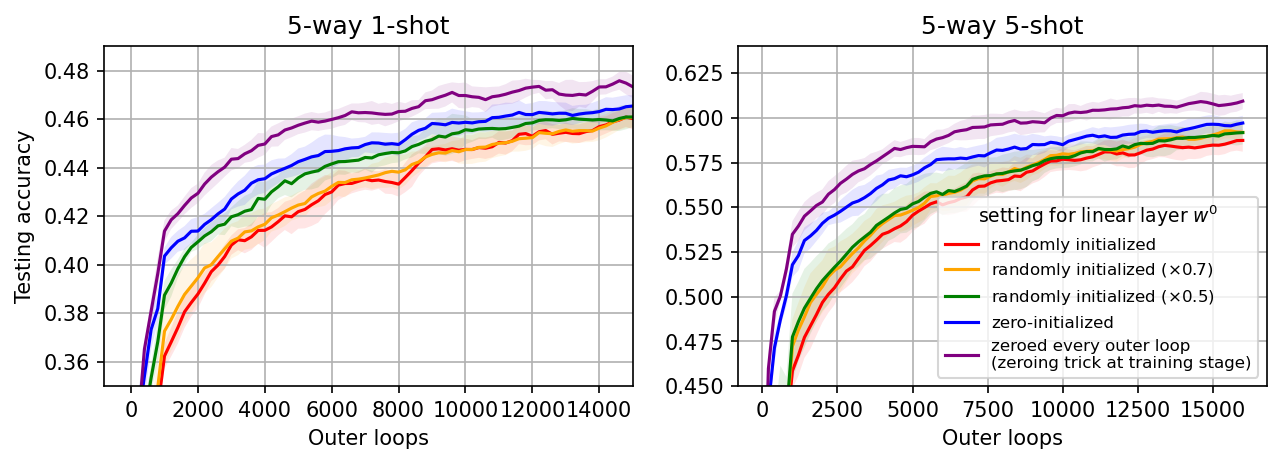

In [3]:
fill_color = True
info = False

labels = [
    "randomly initialized", 
    r"randomly initialized ($\times 0.7$)", 
    r"randomly initialized ($\times 0.5$)", 
    "zero-initialized", 
    "zeroed every outer loop \n(zeroing trick at training stage)",
]

for step in [1]:
    
    fig, axes = plt.subplots(1,2,figsize=(10,3),sharey=False,dpi=150)
    
    mean, std = get_data_mini("mini_5w1s15q_FO_initvar1.0", step)
    axes[0].plot(np.arange(len(mean))*200, mean, label=labels[0], c="red")
    if fill_color: axes[0].fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="red", alpha=0.1)

    mean, std = get_data_mini("mini_5w1s15q_FO_initvar0.7", step)
    axes[0].plot(np.arange(len(mean))*200, mean, label=labels[1], c="orange")
    if fill_color: axes[0].fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="orange", alpha=0.1)

    mean, std = get_data_mini("mini_5w1s15q_FO_initvar0.5", step)
    axes[0].plot(np.arange(len(mean))*200, mean, label=labels[2], c="green")
    if fill_color: axes[0].fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="green", alpha=0.1)

    mean, std = get_data_mini("mini_5w1s15q_FO_initvar0.0", step)
    axes[0].plot(np.arange(len(mean))*200, mean, label=labels[3], c="blue")
    if fill_color: axes[0].fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="blue", alpha=0.1)
        
    mean, std = get_data_mini("mini_5w1s15q_FO_zero1_initvar1.0", step)
    axes[0].plot(np.arange(len(mean))*200, mean, label=labels[4], c="purple")
    if fill_color: axes[0].fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="purple", alpha=0.1)

    ####
        
    mean, std = get_data_mini("mini_5w5s15q_FO_initvar1.0", step)
    axes[1].plot(np.arange(len(mean))*200, mean, label=labels[0], c="red")
    if fill_color: axes[1].fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="red", alpha=0.1)

    mean, std = get_data_mini("mini_5w5s15q_FO_initvar0.7", step)
    axes[1].plot(np.arange(len(mean))*200, mean, label=labels[1], c="orange")
    if fill_color: axes[1].fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="orange", alpha=0.1)

    mean, std = get_data_mini("mini_5w5s15q_FO_initvar0.5", step)
    axes[1].plot(np.arange(len(mean))*200, mean, label=labels[2], c="green")
    if fill_color: axes[1].fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="green", alpha=0.1)

    mean, std = get_data_mini("mini_5w5s15q_FO_initvar0.0", step)
    axes[1].plot(np.arange(len(mean))*200, mean, label=labels[3], c="blue")
    if fill_color: axes[1].fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="blue", alpha=0.1)
        
    mean, std = get_data_mini("mini_5w5s15q_FO_zero1_initvar1.0", step)
    axes[1].plot(np.arange(len(mean))*200, mean, label=labels[4], c="purple")
    if fill_color: axes[1].fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="purple", alpha=0.1)

axes[0].set_xlabel("Outer loops")
axes[1].set_xlabel("Outer loops")
axes[0].set_ylabel("Testing accuracy")

axes[0].set_title("5-way 1-shot")
axes[1].set_title("5-way 5-shot")
axes[0].tick_params(axis='both', which='major')
axes[1].tick_params(axis='both', which='major')
axes[1].legend(loc=4, title=r"setting for linear layer $w^0$", title_fontsize=9, fontsize=8)
axes[0].set_ylim([0.35, 0.49])
axes[1].set_ylim([0.45, 0.64])

axes[0].set_xlim([-800,15000]) 
axes[0].grid()
axes[1].grid()
plt.savefig("./images/mini_init_20220301.pdf", bbox_inches='tight')